# Проект урока 4. Исследование данных и создание метрик
#  «Анализ данных о поездках на такси в Перу»

## Шаг 1

В этом проекте вы снова будете работать с данными по поездкам на такси, но теперь в Перу. Данные разделены на три датасета: в `passengers` информация о поездках со стороны пассажиров, в `drivers` — об этих же поездках со стороны водителей, в `taxi_2` — и та, и та информация, но о других поездках. В каждой строке каждого датасета — запись об одной поездке.

**Описание данных:**

passengers:
- journey_id – уникальный id поездки  
- user_id – id пользователя  
- start_type – тип заказа (asap, reserved, delayed)  
- start_lat – исходное местоположение пользователя, широта  
- start_lon – исходное местоположение пользователя, долгота  
- source – платформа, с которой сделан заказ  
- driver_score – какую оценку клиент поставил водителю  

drivers:
- journey_id – уникальный id поездки  
- driver_id – id водителя  
- taxi_id – id машины  
- icon – тип поездки  
- start_at – время начала поездки  
- end_at – время окончания поездки  
- end_lat – итоговое местоположение, широта  
- end_lon – итоговое местоположение, долгота  
- end_state – состояние заказа  
- driver_start_lat – исходное местоположение водителя, широта  
- driver_start_lon – исходное местоположение водителя, долгота  
- arrived_at – время прибытия водителя  
- rider_score – какую оценку водитель поставил клиенту  

## Шаг 2

**Соберите первую часть данных.** Для этого прочитайте датасеты `passengers` и `drivers`. Объедините датафреймы в единый по ключу — колонке `journey_id`.

**Сколько столбцов с типом `object` у вас получилось в объединенном датафрейме?**

In [1]:
import pandas as pd

In [2]:
passengers = pd.read_csv('passengers.csv')
drivers = pd.read_csv('drivers.csv')


In [3]:
passengers.head()

,journey_id,user_id,start_type,start_lat,start_lon,source,driver_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,asap,"-12,13983536","-77,02355957",iPhone,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,asap,"-12,13874817","-76,99536133",iPhone,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,asap,"-12,12453079","-77,02780151",iPhone,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,asap,"-12,13885117","-76,99530029",iPhone,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,reserved,"-12,08995438","-76,92626953",iPhone,4.0


In [4]:
drivers.head()

,journey_id,driver_id,taxi_id,icon,start_at,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,2010-11-16 16:44:00,2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,5.0
1,dd2af4715d0dc16eded53afc0e243577,NaN,NaN,executive,2010-06-01 00:34:00,2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,NaN,NaN,executive,2010-05-31 05:01:00,2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,NaN,NaN,executive,2010-06-01 00:29:00,2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,2010-09-11 23:55:00,2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,5.0


In [10]:
df = drivers.merge(passengers, on='journey_id')
df.head()

,journey_id,driver_id,taxi_id,icon,start_at,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,rider_score,user_id,start_type,start_lat,start_lon,source,driver_score
0,23a1406fc6a11d866e3c82f22eed4d4c,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,2010-11-16 16:44:00,2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,5.0,0e9af5bbf1edfe591b54ecdfd7e91e26,asap,"-12,13983536","-77,02355957",iPhone,5.0
1,dd2af4715d0dc16eded53afc0e243577,NaN,NaN,executive,2010-06-01 00:34:00,2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaN,NaN,a553c46e3a22fb9c326aeb3d72b3334e,asap,"-12,13874817","-76,99536133",iPhone,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,NaN,NaN,executive,2010-05-31 05:01:00,2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaN,NaN,a553c46e3a22fb9c326aeb3d72b3334e,asap,"-12,12453079","-77,02780151",iPhone,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,NaN,NaN,executive,2010-06-01 00:29:00,2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaN,NaN,a553c46e3a22fb9c326aeb3d72b3334e,asap,"-12,13885117","-76,99530029",iPhone,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,2010-09-11 23:55:00,2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,5.0,56772d544fdfa589a020a1ff894a86f7,reserved,"-12,08995438","-76,92626953",iPhone,4.0


In [12]:
df.shape


(11555, 19)

In [19]:
df.dtypes

journey_id           object
driver_id            object
taxi_id              object
icon                 object
start_at             object
end_at               object
end_lat              object
end_lon              object
end_state            object
driver_start_lat     object
driver_start_lon     object
arrived_at           object
rider_score         float64
user_id              object
start_type           object
start_lat            object
start_lon            object
source               object
driver_score        float64
dtype: object

In [20]:
c = 0
for el in df.dtypes:
    if el == 'object':
        c += 1
print(c)

17


## Шаг 3

**Теперь первую часть данных (объединенный датафрейм) нужно соединить со второй частью из датасета `taxi_2`.** Для этого сначала прочитайте датасет `taxi_2`. После этого соедините (сконкатенируйте) первую (полученную на прошлом шаге) и вторую часть данных. **Датафрейм какого размера у вас получился?**

In [27]:
taxi = pd.read_csv('taxi_2.csv')

In [28]:
taxi.head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,b6206048fbda6d454ead4fa2b4b9beaf,d0de230345480ca6bcc86ce1eb89fbfa,40187316352d2c03ddc19e9c8ad7c514,42aa958edf790ef3d45823386fb734ea,executive,asap,2010-11-30 03:38:00,"-11,95227432","-76,81442261",2010-11-30 03:39:00,"40,4052887","-3,72117424",rider cancel,"-12,08863069","-76,96650439",NaN,iPhone,NaN,NaN
1,d2cf43d9f47c6512b84e1ea7b8746a0c,8e37a68fab5f31a5e2c1b5f77c6bb9e5,1d8ba0bdacccf2d0d70ee9925185d231,1d8ba0bdacccf2d0d70ee99251862c54,executive,reserved,2010-11-28 22:30:00,"-12,0495456","-77,1116799",2010-11-29 00:22:00,"-12,11973","-76,998734",drop off,"-12,04809647","-77,096405",2010-11-28 22:02:00,web,NaN,NaN
2,7c01cd25b39f4f8b234bf56d48a5e9c9,8e37a68fab5f31a5e2c1b5f77c6bb9e5,ecdcce0c956e266ed26c80fd9e5cbb8f,1d3c551d7fc3d0daf73f0a8c82781c2d,executive,reserved,2010-11-28 22:30:00,"-12,0511575","-77,1300437",2010-11-28 23:04:00,"-12,0794453","-77,0896372",drop off,0,0,2010-11-28 22:34:00,web,NaN,NaN
3,ab90a1bf4289d96e78d4a47d7cc2286d,1e639fc120efea2675ac138ebeac4c2f,12c472dd8efc6ed622ae8669251b82f1,c26f22be31323781fd478dbcf8926d44,executive,asap,2010-11-28 01:04:00,"-12,0979889","-77,0223812",2010-11-28 01:32:00,"-12,1192177","-77,0413569",drop off,"-12,08757569","-77,03611258",2010-11-28 01:15:00,web,NaN,4.0
4,d2cf43d9f47c6512b84e1ea7b8740874,2f1882c87731970df63e69d4bc254f96,3abce16ea601affbeae8f50584ce72ef,ab6ee368af1a9e1293acc0d14d1f9338,executive,reserved,2010-11-28 01:50:00,"-12,0903136","-77,0424105",2010-11-28 02:18:00,"43,5398067","-5,6575304",drop off,"-12,11418993","-77,03732522",2010-11-28 01:43:00,Wap,NaN,5.0


In [29]:
df_new = pd.concat([df, taxi])

In [30]:
df_new.head()

,journey_id,driver_id,taxi_id,icon,start_at,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,rider_score,user_id,start_type,start_lat,start_lon,source,driver_score
0,23a1406fc6a11d866e3c82f22eed4d4c,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,2010-11-16 16:44:00,2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,5.0,0e9af5bbf1edfe591b54ecdfd7e91e26,asap,"-12,13983536","-77,02355957",iPhone,5.0
1,dd2af4715d0dc16eded53afc0e243577,NaN,NaN,executive,2010-06-01 00:34:00,2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaN,NaN,a553c46e3a22fb9c326aeb3d72b3334e,asap,"-12,13874817","-76,99536133",iPhone,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,NaN,NaN,executive,2010-05-31 05:01:00,2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaN,NaN,a553c46e3a22fb9c326aeb3d72b3334e,asap,"-12,12453079","-77,02780151",iPhone,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,NaN,NaN,executive,2010-06-01 00:29:00,2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaN,NaN,a553c46e3a22fb9c326aeb3d72b3334e,asap,"-12,13885117","-76,99530029",iPhone,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,2010-09-11 23:55:00,2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,5.0,56772d544fdfa589a020a1ff894a86f7,reserved,"-12,08995438","-76,92626953",iPhone,4.0


In [31]:
df_new.shape



(23111, 19)

## Шаг 4

Теперь во всех заданиях будем работать с полным датафреймом, собранным из трех частей. Прежде чем перейдем к анализу этих данных, стоит узнать, есть ли в них пропущенные значения и как много. **Проверьте, в какой колонке датафрейма больше всего пропущенных значений.** Введите её название.

In [33]:
df_new.isna().sum()

journey_id              0
driver_id            3385
taxi_id              3385
icon                    0
start_at                0
end_at                276
end_lat                 0
end_lon                 0
end_state              12
driver_start_lat     3490
driver_start_lon     3490
arrived_at           5395
rider_score          7721
user_id                 0
start_type              0
start_lat               0
start_lon               0
source                123
driver_score        15461
dtype: int64

## Шаг 5

Теперь перейдем к анализу данных и начнем с платформ. Посмотрите, какие платформы есть в наших данных. **В ответе укажите число уникальных названий платформ**

In [38]:
res = df_new.source.dropna().unique()
res

array(['iPhone', 'Android', 'web', 'iPad', 'Wap'], dtype=object)

In [39]:
len(res)


5

## Шаг 6

Перейдем к анализу этих платформ. **Определите долю заказов, сделанных с той или иной платформы.** У какой платформы эта доля самая большая? **В ответе укажите значение наибольшей доли заказов в %, округлённое до целого.**

In [46]:
res = df_new.source.value_counts(normalize=True)*100
res

iPhone     42.374282
web        33.195580
Android    21.354620
iPad        2.483905
Wap         0.591613
Name: source, dtype: float64

## Шаг 7

Чтобы различие в количестве заказов с той или иной платформы было нагляднее, построим график. **Агрегируйте данные и постройте барчарт, где по оси `x` будет расположено название платформы (`source`), а по оси `y` – количество заказов (абсолютные значения, не доля).**

Выберите, какой график у вас получился?

*Если на графике не видны значения на осях, используйте светлую тему в JupyterHub или посмотрите графики на LMS*

![](https://storage.yandexcloud.net/klms-public/production/learning-content/65/801/6468/19025/78899/%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_3_10.png)

In [52]:
res = df_new.source.value_counts().reset_index()
res

,index,source
0,iPhone,9741
1,web,7631
2,Android,4909
3,iPad,571
4,Wap,136


In [54]:
res = res.rename(columns={'index':'platform', 'source':'count'})
res

,platform,count
0,iPhone,9741
1,web,7631
2,Android,4909
3,iPad,571
4,Wap,136


In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

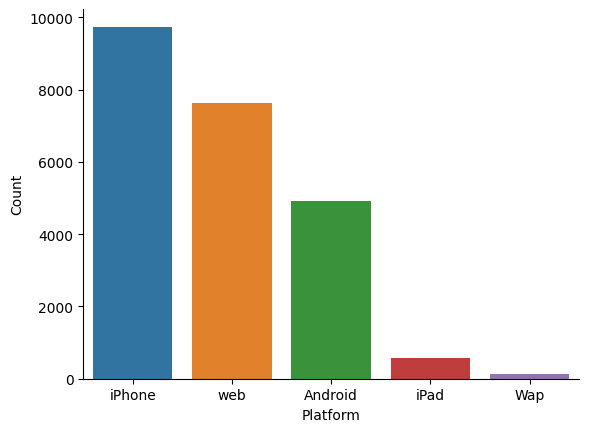

In [66]:
sns.barplot(data=res, x='platform', y='count')

plt.xlabel('Platform')
plt.ylabel('Count')
sns.despine()

## Шаг 8

Более детально проанализируем распределение заказов по платформам. **С помощью функции `sns.countplot` и параметра `hue` визуализируйте распределение переменной `end_state` (итоговое состояние заказа) в разбивке по платформам (см.колонку `source`).**

**Выберите одно или несколько верных утверждений:**  
- Больше всего заказов со статусом drop off совершено с платформы iPhone  
- На Android количество отмененных поездок (rider cancel) меньше, чем на iPhone  
- На web отмененных поездок (rider cancel) меньше, чем на Android  
- Наибольшая разница между количеством drop off и rider cancel наблюдается для платформы iPhone  
- Наибольшая разница между количеством drop off и rider cancel наблюдается для платформы Android

<AxesSubplot:xlabel='source', ylabel='count'>

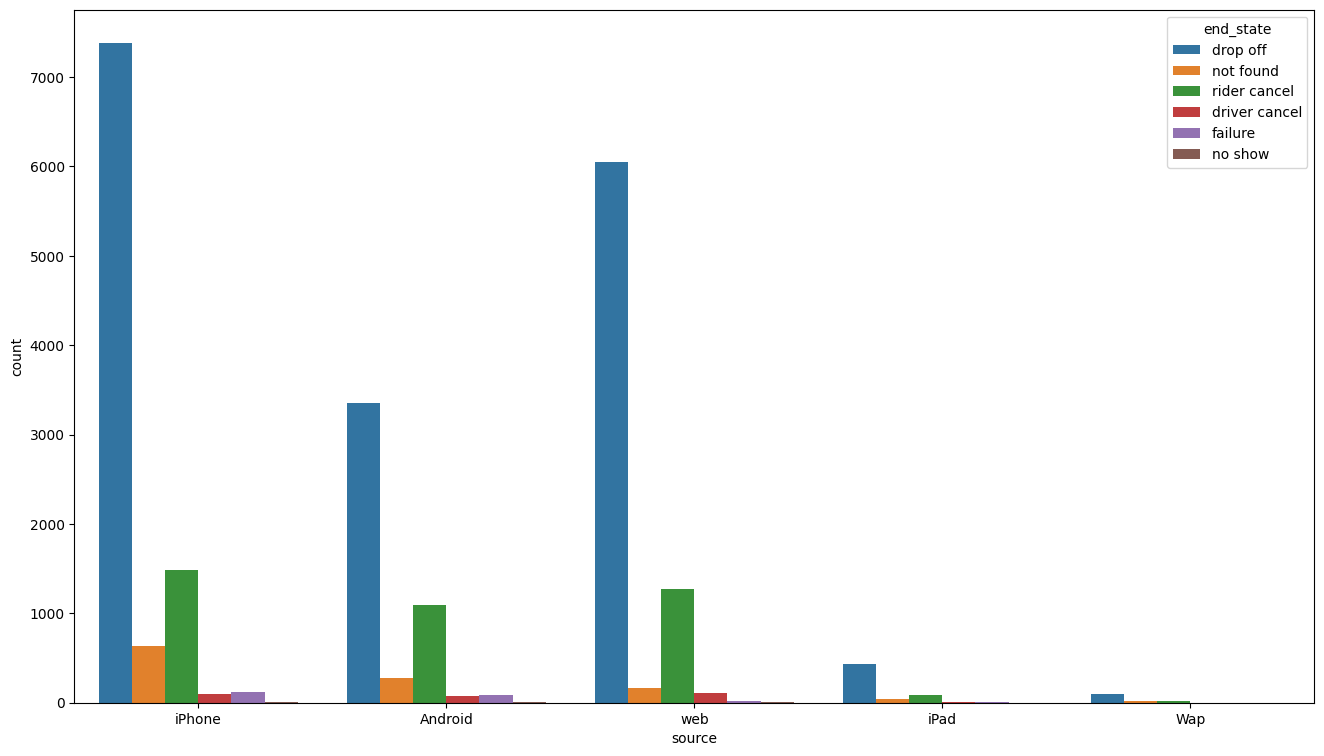

In [73]:
df_new
plt.figure(figsize=(16,9))
sns.countplot(data=df_new, hue='end_state', x='source')

## Шаг 9

С платформами разобрались. Теперь давайте перейдем к анализу оценок, которые ставят пассажиры водителям и водители пассажирам.

**Проверьте, как распределены оценки водителей (см.колонку `driver_score`)**. Для подготовки данных выполните следующие шаги:

1. Посчитайте *частоту* встречаемости каждой из оценок  
2. Переведите в проценты
3. Округлите до 2 знаков после точки  
4. Сбросьте индекс  
5. Переименуйте колонки в `driver_score` и `percentage`  
6. Отсортируйте датафрейм по колонке `driver_score` в порядке возрастания    
7. Запишите результат в переменную `driver_score_counts`

Может пригодиться:  
[mul()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.mul.html) – умножение, более удобный вариант для использования в цепочке методов

In [88]:
taxi = df_new

In [103]:
driver_score_counts = (taxi.driver_score\
    .value_counts(normalize=True)*100)\
    .round(2)\
    .reset_index()\
    .sort_values('index')\
    .rename(columns={'index':'driver_score', 'driver_score':'percentage'})
driver_score_counts

,driver_score,percentage
2,0.0,14.30
4,1.0,1.23
5,2.0,0.81
3,3.0,2.97
1,4.0,21.88
0,5.0,58.81


## Шаг 10

**Используем получившийся на прошлом шаге датафрейм `driver_score_counts`, чтобы построить круговую диаграмму (pie chart, пайчарт) и посмотреть на долю каждой оценки.** Чтобы получился график, как на скрине ниже, сделайте следующее:

1. Отсортируйте датафрейм по убыванию процентов каждой оценки,  
2. Используйте [функцию `pie`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html) из модуля `pyplot` библиотеки `matplotlib`  
3. Задайте угол начала графика равным 90 (см.параметр `startangle`)
4. Поверните подписи к секторам (см.параметр `rotatelabels`)
5. Установите размер графика как (8,8)

**Выберите наиболее похожий график на тот, что получился у вас.**

*Если на графике не видны значения на осях, используйте светлую тему в JupyterHub или посмотрите графики на LMS*

A
![A](https://storage.yandexcloud.net/klms-public/production/learning-content/457/4167/37258/103292/490869/A.png)

B
![B](https://storage.yandexcloud.net/klms-public/production/learning-content/457/4167/37258/103292/490869/B.png)

C
![C](https://storage.yandexcloud.net/klms-public/production/learning-content/457/4167/37258/103292/490869/C.png)

D
![D](https://storage.yandexcloud.net/klms-public/production/learning-content/457/4167/37258/103292/490869/D.png)

*На будущее учтите, что круговая диаграмма может быть неудобна из-за того, что определить точные значения по ней сложно и нужно сравнивать между собой площади секторов. Подробнее об этом поговорим в модуле по визуализации*.

In [115]:
driver_score_counts = driver_score_counts.sort_values('percentage', ascending=False)
driver_score_counts

,driver_score,percentage
0,5.0,58.81
1,4.0,21.88
2,0.0,14.30
3,3.0,2.97
4,1.0,1.23
5,2.0,0.81


<function matplotlib.pyplot.show(close=None, block=None)>

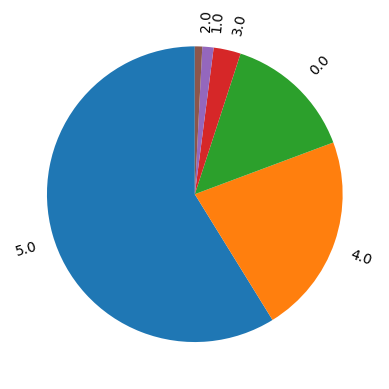

<Figure size 800x800 with 0 Axes>

In [105]:
plt.pie(driver_score_counts.percentage, startangle=90, rotatelabels=True, labels=driver_score_counts.driver_score)
plt.figure(figsize=(8,8))  
plt.show

## Шаг 11

Сейчас повторите процесс из шага 9 и проанализируйте оценки водителями пассажиров (см.колонку `rider_score`). **Сравните распределение этих оценок с распределением оценок водителей.**

**Выберите одно или несколько верных утверждений:**  
- Более 20% оценок составляют 4  
- Более чем в 80% случаев водители поставили клиентам 5 звездочек  
- Водители ставят меньше оценок 0, чем клиенты  
- Водители ставят больше оценок 0, чем клиенты

In [107]:
rider_score_counts = (taxi.rider_score\
    .value_counts(normalize=True)*100)\
    .round(2)\
    .reset_index()\
    .sort_values('index')\
    .rename(columns={'index':'rider_score', 'rider_score':'percentage'})
rider_score_counts


,rider_score,percentage
2,0.0,2.29
4,1.0,0.21
5,2.0,0.19
3,3.0,1.38
1,4.0,8.83
0,5.0,87.10


<function matplotlib.pyplot.show(close=None, block=None)>

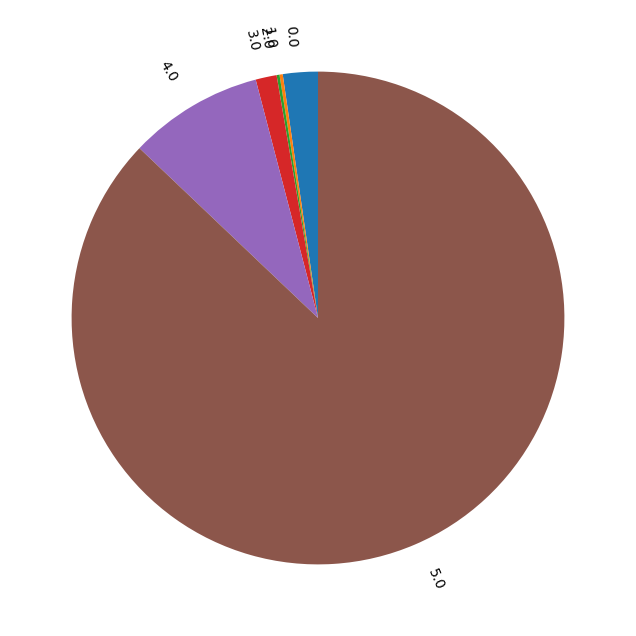

In [114]:
plt.figure(figsize=(8,8))  
plt.pie(rider_score_counts.percentage, startangle=90, rotatelabels=True, labels=rider_score_counts.rider_score)
plt.show

## Шаг 12

Теперь перейдем к анализу временнЫх данных. Но перед этим приведите столбцы `start_at`, `end_at`, `arrived_at` к формату даты и времени, используя [pd.to_datetime](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html). Отфильтруйте данные и оставьте наблюдения со статусами заказа "asap" и "reserved" (см.колонку `start_type`). Результат сохраните в тот же датафрейм `taxi`  

**На LMS датафрейм сохранен в переменную `taxi`. Загрузите в LMS Ваш код, в котором приводите столбцы к формату datetime и оставляете в датафрейме `taxi` только наблюдения со статусами заказа «asap» и «reserved»**

In [121]:
taxi.head()


,journey_id,driver_id,taxi_id,icon,start_at,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,rider_score,user_id,start_type,start_lat,start_lon,source,driver_score
0,23a1406fc6a11d866e3c82f22eed4d4c,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,2010-11-16 16:44:00,2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,5.0,0e9af5bbf1edfe591b54ecdfd7e91e26,asap,"-12,13983536","-77,02355957",iPhone,5.0
1,dd2af4715d0dc16eded53afc0e243577,NaN,NaN,executive,2010-06-01 00:34:00,2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaN,NaN,a553c46e3a22fb9c326aeb3d72b3334e,asap,"-12,13874817","-76,99536133",iPhone,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,NaN,NaN,executive,2010-05-31 05:01:00,2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaN,NaN,a553c46e3a22fb9c326aeb3d72b3334e,asap,"-12,12453079","-77,02780151",iPhone,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,NaN,NaN,executive,2010-06-01 00:29:00,2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaN,NaN,a553c46e3a22fb9c326aeb3d72b3334e,asap,"-12,13885117","-76,99530029",iPhone,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,2010-09-11 23:55:00,2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,5.0,56772d544fdfa589a020a1ff894a86f7,reserved,"-12,08995438","-76,92626953",iPhone,4.0


In [134]:
taxi[['start_at', 'end_at', 'arrived_at']] = taxi[['start_at', 'end_at', 'arrived_at']].apply(pd.to_datetime)

In [136]:
taxi.dtypes


journey_id                  object
driver_id                   object
taxi_id                     object
icon                        object
start_at            datetime64[ns]
end_at              datetime64[ns]
end_lat                     object
end_lon                     object
end_state                   object
driver_start_lat            object
driver_start_lon            object
arrived_at          datetime64[ns]
rider_score                float64
user_id                     object
start_type                  object
start_lat                   object
start_lon                   object
source                      object
driver_score               float64
dtype: object

In [139]:
taxi = taxi.query('start_type == "asap" or start_type == "reserved"')
taxi.head()

,journey_id,driver_id,taxi_id,icon,start_at,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,rider_score,user_id,start_type,start_lat,start_lon,source,driver_score
0,23a1406fc6a11d866e3c82f22eed4d4c,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,2010-11-16 16:44:00,2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,5.0,0e9af5bbf1edfe591b54ecdfd7e91e26,asap,"-12,13983536","-77,02355957",iPhone,5.0
1,dd2af4715d0dc16eded53afc0e243577,NaN,NaN,executive,2010-06-01 00:34:00,2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,NaN,a553c46e3a22fb9c326aeb3d72b3334e,asap,"-12,13874817","-76,99536133",iPhone,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,NaN,NaN,executive,2010-05-31 05:01:00,2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,NaN,a553c46e3a22fb9c326aeb3d72b3334e,asap,"-12,12453079","-77,02780151",iPhone,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,NaN,NaN,executive,2010-06-01 00:29:00,2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaT,NaN,a553c46e3a22fb9c326aeb3d72b3334e,asap,"-12,13885117","-76,99530029",iPhone,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,2010-09-11 23:55:00,2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,5.0,56772d544fdfa589a020a1ff894a86f7,reserved,"-12,08995438","-76,92626953",iPhone,4.0


## Шаг 13

Начнем анализировать время подачи машины — долго ли пассажирам приходится ждать такси. Для этого создайте новую колонку `wait_time`, в которой будет храниться разница между временем подачи машины (см.колонку `arrived_at`) и временем заказа (см.колонку `start_at`). **Определите медианное время подачи машины, в минутах. Ответ дайте в формате целого числа**

In [146]:
taxi['wait_time'] = taxi.arrived_at  - taxi.start_at 
taxi.wait_time.median()

Timedelta('0 days 00:05:00')

## Шаг 14

Если клиент сделал заказ к определенному времени (`start_type` == 'reserved'), но ему пришлось ждать машину (`wait_time` > 0), значит, водитель опоздал. **Определите id водителя, который чаще всего опаздывал на заказы, заранее сделанные клиентами**

Обратите внимание, данные в колонке `wait_time` имеют тип `timedelta` — разница во времени. Чтобы корректно отобрать записи об опозданиях, вам понадобится не целое число 0, а разница во времени, равная 0. Такую переменную можно создать с помощью функции [pd.to_timedelta](https://pandas.pydata.org/docs/reference/api/pandas.to_timedelta.html), которая конвертирует подаваемый в неё аргумент в значение с типом `timedelta`

In [165]:
new_variable = pd.to_timedelta(0)
new_variable

Timedelta('0 days 00:00:00')

In [172]:
res = taxi.query(f'start_type == "reserved" and wait_time>"{new_variable}"')
res

,journey_id,driver_id,taxi_id,icon,start_at,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,rider_score,user_id,start_type,start_lat,start_lon,source,driver_score,wait_time
11,af7a0d5b65562d9e4f7749317efb1a3a,d04f1a596fe4a582f48e6eb2f9e8f617,d04f1a596fe4a582f48e6eb2f9e8cceb,executive,2010-11-28 03:15:00,2010-11-28 03:37:00,"-12,10112256","-77,00418301",drop off,"-12,1011259","-77,0041831",2010-11-28 03:22:00,4.0,7abecd4f47c2c1d5390d86eb22181c90,reserved,"-12,10128779","-77,00463697",Android,NaN,0 days 00:07:00
51,e1b5a14977e84b1900b5b69e040c3de1,ae06c34243f741e203e97c48ebcbd9da,f622a9397b85b5c9c0ef938c5d592020,executive,2010-10-12 19:45:00,2010-10-12 20:49:00,"-12,02226257","-77,109375",drop off,"-12,02907305","-77,08317745",2010-10-12 19:56:00,5.0,1e44c0fd0a266c3719ff30410baa07cd,reserved,"-12,11184692","-77,03222656",iPhone,NaN,0 days 00:11:00
67,eb06449983dd990ff162c0ad990909ba,406921adcca37705ef527b4246c0cfea,406921adcca37705ef527b4246c10d2c,executive,2010-06-01 22:00:00,2010-06-01 22:42:00,"-12,07870483","-77,06329346",drop off,"-12,11143646","-76,99240794",2010-06-01 22:01:00,5.0,933a5cf7834b12121755b8586b53a083,reserved,"-12,12078476","-76,97079468",iPhone,4.0,0 days 00:01:00
83,cd6a65a00f3ac91060d336a9f037f7f6,baacf396f773709519bbde35a5eab861,baacf396f773709519bbde35a585d91b,executive,2010-08-16 22:30:00,2010-08-16 22:57:00,"-12,08880914","-76,99084405",drop off,"-12,06300311","-76,94575123",2010-08-16 22:33:00,4.0,cb6ea169cefc7a0a5f1f8bd8ebbe3223,reserved,"-12,10181985","-76,97150599",Android,0.0,0 days 00:03:00
157,e1332f68e81526e498e4d845233a17ee,65b6f3b7075270499ddd0f1dc1130459,f78d50ea4f0c83a4a302d9fa82264b02,executive,2010-03-27 23:30:00,2010-03-28 00:25:00,"-12,1249782","-77,0048048",drop off,"-12,08623295","-77,03547408",2010-03-27 23:31:00,5.0,be2d7041cb5bae52cf3edaaf03798426,reserved,"-12,0966369","-77,0295319",web,NaN,0 days 00:01:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11489,883360491194dd3b866c897b2586a1d7,27c157e605c56c7df70c605963e1d386,27c157e605c56c7df70c605963e1c9b7,executive,2010-02-14 13:45:00,2010-02-14 14:19:00,"-12,1593476","-77,0232917",drop off,"-12,0735807","-77,04195549",2010-02-14 13:49:00,NaN,406921adcca37705ef527b4246c1370e,reserved,"-12,0918521","-77,0519091",web,NaN,0 days 00:04:00
11492,88a0d8a123b3c1b2f39bec89da7b30ae,406921adcca37705ef527b4246c19db3,406921adcca37705ef527b4246c1a5c6,executive,2010-05-07 13:20:00,2010-05-07 14:13:00,"-12,0914361","-77,0857564",drop off,"-12,03970949","-77,05231815",2010-05-07 13:21:00,5.0,406921adcca37705ef527b4246c12e83,reserved,"-12,0918423","-77,0421839",web,NaN,0 days 00:01:00
11498,8b9ae8141b48ed1643e02dbc76aa2290,406921adcca37705ef527b4246c19db3,406921adcca37705ef527b4246c1a5c6,executive,2010-05-09 01:30:00,2010-05-09 02:50:00,"-12,019468","-77,107768",drop off,"-12,05495955","-77,05101171",2010-05-09 01:40:00,NaN,0f0ffd9676b4aa664f8b88b76ca90cf4,reserved,"-12,0780836","-77,0906339",web,NaN,0 days 00:10:00
11508,4a645cbfd25b64d34f738808637353ca,eeb07ac5409c082354b923689341b9ec,aba044a086704ad7e9dc66b8c926408d,executive,2010-04-16 15:15:00,2010-04-16 15:40:00,"-12,1088702","-76,9886223",drop off,"-12,04602095","-77,02585903",2010-04-16 15:18:00,NaN,4a645cbfd25b64d34f738808634b36bf,reserved,"-12,0770342","-76,9885396",web,NaN,0 days 00:03:00


In [176]:
res.driver_id.value_counts()



406921adcca37705ef527b4246c0cfea    67
d665fb9f75ef5d9cd0fd89479380ba78    59
ec84a73745199ff840ecafcb924383ad    57
56f59b58bcbbd1cdabc3652e713134c2    51
c814db2127582cf95dea1f74f43127c2    45
                                    ..
b5821eaaa5d49fb2936ff5b0ffa34a35     1
2ca81f8112b8c60af222ee2ed746de12     1
cd6fba80de11849ce566009f41dd27a0     1
bc5c1ae63a528f0371154594b3477211     1
9db6243faff23197787d1efc5f93904d     1
Name: driver_id, Length: 105, dtype: int64

## Шаг 15

**Подумайте, что может влиять на число опозданий водителя из прошлого задания.** Проанализируйте имеющиеся у вас данные и выберите один или несколько вариантов:  
- Число взятых заказов  
- Оценки, поставленные этим водителем его пассажирам  
- Непунктуальность водителя (доля опозданий от всех его поездок у этого водителя больше, чем соответствующие доли у всех остальных водителей)
- Цвет его машины

In [186]:
journeys = taxi.groupby('driver_id', as_index = False)\
    .agg({'journey_id':'nunique'})\
    .sort_values('journey_id', ascending = False)\
    .rename(columns = {'journey_id':'journey_num'})

journeys.head()

,driver_id,journey_num
129,c814db2127582cf95dea1f74f43127c2,1523
139,d665fb9f75ef5d9cd0fd89479380ba78,1225
167,ff5c924e0b630fd7c019a4234059fdf4,1111
38,406921adcca37705ef527b4246c0cfea,1075
148,ec84a73745199ff840ecafcb924383ad,974


In [190]:
delays = taxi.query('start_type == "reserved" and wait_time > @new_variable')\
    .groupby('driver_id', as_index = False)\
    .agg({'journey_id':'nunique'})\
    .sort_values('journey_id', ascending = False)\
    .rename(columns = {'journey_id':'delay_num'})

delays.head()


,driver_id,delay_num
24,406921adcca37705ef527b4246c0cfea,67
86,d665fb9f75ef5d9cd0fd89479380ba78,59
93,ec84a73745199ff840ecafcb924383ad,57
29,56f59b58bcbbd1cdabc3652e713134c2,51
77,c814db2127582cf95dea1f74f43127c2,45


In [191]:
journeys_delays = journeys.merge(delays, on = 'driver_id')
journeys_delays['late_score'] = round(100 * journeys_delays.delay_num / journeys_delays.journey_num)
journeys_delays.sort_values('delay_num', ascending = False).head()



,driver_id,journey_num,delay_num,late_score
3,406921adcca37705ef527b4246c0cfea,1075,67,6.0
1,d665fb9f75ef5d9cd0fd89479380ba78,1225,59,5.0
4,ec84a73745199ff840ecafcb924383ad,974,57,6.0
13,56f59b58bcbbd1cdabc3652e713134c2,481,51,11.0
0,c814db2127582cf95dea1f74f43127c2,1523,45,3.0


In [192]:
journeys_delays.late_score.describe()


count    105.000000
mean      10.133333
std       10.441289
min        1.000000
25%        4.000000
50%        7.000000
75%       12.000000
max       67.000000
Name: late_score, dtype: float64

## Шаг 16

С опозданиями разобрались. Теперь расширим наши данные новыми признаками: **добавьте столбец `month`, где будет храниться номер месяца, в котором был сделан заказ (см.колонку `start_at`),  и столбец `weekday` – название дня недели.**

In [197]:
taxi['month'] = taxi.start_at.dt.month
taxi



,journey_id,driver_id,taxi_id,icon,start_at,end_at,end_lat,end_lon,end_state,driver_start_lat,...,rider_score,user_id,start_type,start_lat,start_lon,source,driver_score,wait_time,month,weekday
0,23a1406fc6a11d866e3c82f22eed4d4c,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,2010-11-16 16:44:00,2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481",...,5.0,0e9af5bbf1edfe591b54ecdfd7e91e26,asap,"-12,13983536","-77,02355957",iPhone,5.0,0 days 00:18:00,11,16
1,dd2af4715d0dc16eded53afc0e243577,NaN,NaN,executive,2010-06-01 00:34:00,2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,...,NaN,a553c46e3a22fb9c326aeb3d72b3334e,asap,"-12,13874817","-76,99536133",iPhone,NaN,NaT,6,1
2,dd91e131888064bf7df3ce08f3d4b4ad,NaN,NaN,executive,2010-05-31 05:01:00,2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,...,NaN,a553c46e3a22fb9c326aeb3d72b3334e,asap,"-12,12453079","-77,02780151",iPhone,NaN,NaT,5,31
3,dd2af4715d0dc16eded53afc0e2466d0,NaN,NaN,executive,2010-06-01 00:29:00,2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,...,NaN,a553c46e3a22fb9c326aeb3d72b3334e,asap,"-12,13885117","-76,99530029",iPhone,NaN,NaT,6,1
4,85b7eabcf5d84e42dc7629b7d27781af,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,2010-09-11 23:55:00,2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558",...,5.0,56772d544fdfa589a020a1ff894a86f7,reserved,"-12,08995438","-76,92626953",iPhone,4.0,-1 days +23:55:00,9,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11551,4a18ea5737ce0ffecaf20b305a0e2c86,d665fb9f75ef5d9cd0fd89479380ba78,16cbe35db7fff70fbc8251b4cda9fdc9,executive,2010-07-31 13:15:00,2010-07-31 13:27:00,"-12,08352661","-77,05044556",drop off,"-12,08973527",...,5.0,8998bb370b5f0cec43a373adebba0c72,reserved,"-12,08974075","-77,04699707",iPhone,5.0,0 days 00:00:00,7,31
11552,f1e4317f2c17991dd90d1cd17ae0d399,17c21284245ff240c7212732991c2373,716a697375634f32a06d692b0448f13d,executive,2010-10-02 05:26:00,2010-10-02 05:56:00,"-12,07776001","-77,05623798",drop off,"-12,10639693",...,5.0,5f8a6ffef0ea5df78a8ee890267b60ec,asap,"-12,09253011","-77,02875271",Android,NaN,0 days 00:13:00,10,2
11553,1e44c0fd0a266c3719ff30410b257bce,4851ee4c867c9b49b909c1adb76c31e9,4851ee4c867c9b49b909c1adb76c538e,executive,2010-09-21 09:56:00,2010-09-21 10:18:00,"-12,10529838","-77,04735249",drop off,"-12,12605017",...,0.0,c0ffb6f6cd801004dd8609c12277c2d1,asap,"-12,1275637","-77,02642288",Android,0.0,0 days 00:09:00,9,21
11554,7073883383b89ad289e864022150cdd7,56f59b58bcbbd1cdabc3652e713134c2,924d4f0e7554566623e8ebb3904a7b0c,executive,2010-04-29 04:30:00,2010-04-29 05:11:00,"-12,09909987","-77,03475013",drop off,"-12,0710933",...,5.0,c0ffb6f6cd801004dd8609c12277c2d1,reserved,"-12,019468","-77,1077669",Android,NaN,-1 days +23:53:00,4,29


In [204]:
taxi['weekday'] = taxi.start_at.dt.day_name()
taxi


,journey_id,driver_id,taxi_id,icon,start_at,end_at,end_lat,end_lon,end_state,driver_start_lat,...,rider_score,user_id,start_type,start_lat,start_lon,source,driver_score,wait_time,month,weekday
0,23a1406fc6a11d866e3c82f22eed4d4c,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,2010-11-16 16:44:00,2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481",...,5.0,0e9af5bbf1edfe591b54ecdfd7e91e26,asap,"-12,13983536","-77,02355957",iPhone,5.0,0 days 00:18:00,11,Tuesday
1,dd2af4715d0dc16eded53afc0e243577,NaN,NaN,executive,2010-06-01 00:34:00,2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,...,NaN,a553c46e3a22fb9c326aeb3d72b3334e,asap,"-12,13874817","-76,99536133",iPhone,NaN,NaT,6,Tuesday
2,dd91e131888064bf7df3ce08f3d4b4ad,NaN,NaN,executive,2010-05-31 05:01:00,2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,...,NaN,a553c46e3a22fb9c326aeb3d72b3334e,asap,"-12,12453079","-77,02780151",iPhone,NaN,NaT,5,Monday
3,dd2af4715d0dc16eded53afc0e2466d0,NaN,NaN,executive,2010-06-01 00:29:00,2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,...,NaN,a553c46e3a22fb9c326aeb3d72b3334e,asap,"-12,13885117","-76,99530029",iPhone,NaN,NaT,6,Tuesday
4,85b7eabcf5d84e42dc7629b7d27781af,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,2010-09-11 23:55:00,2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558",...,5.0,56772d544fdfa589a020a1ff894a86f7,reserved,"-12,08995438","-76,92626953",iPhone,4.0,-1 days +23:55:00,9,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11551,4a18ea5737ce0ffecaf20b305a0e2c86,d665fb9f75ef5d9cd0fd89479380ba78,16cbe35db7fff70fbc8251b4cda9fdc9,executive,2010-07-31 13:15:00,2010-07-31 13:27:00,"-12,08352661","-77,05044556",drop off,"-12,08973527",...,5.0,8998bb370b5f0cec43a373adebba0c72,reserved,"-12,08974075","-77,04699707",iPhone,5.0,0 days 00:00:00,7,Saturday
11552,f1e4317f2c17991dd90d1cd17ae0d399,17c21284245ff240c7212732991c2373,716a697375634f32a06d692b0448f13d,executive,2010-10-02 05:26:00,2010-10-02 05:56:00,"-12,07776001","-77,05623798",drop off,"-12,10639693",...,5.0,5f8a6ffef0ea5df78a8ee890267b60ec,asap,"-12,09253011","-77,02875271",Android,NaN,0 days 00:13:00,10,Saturday
11553,1e44c0fd0a266c3719ff30410b257bce,4851ee4c867c9b49b909c1adb76c31e9,4851ee4c867c9b49b909c1adb76c538e,executive,2010-09-21 09:56:00,2010-09-21 10:18:00,"-12,10529838","-77,04735249",drop off,"-12,12605017",...,0.0,c0ffb6f6cd801004dd8609c12277c2d1,asap,"-12,1275637","-77,02642288",Android,0.0,0 days 00:09:00,9,Tuesday
11554,7073883383b89ad289e864022150cdd7,56f59b58bcbbd1cdabc3652e713134c2,924d4f0e7554566623e8ebb3904a7b0c,executive,2010-04-29 04:30:00,2010-04-29 05:11:00,"-12,09909987","-77,03475013",drop off,"-12,0710933",...,5.0,c0ffb6f6cd801004dd8609c12277c2d1,reserved,"-12,019468","-77,1077669",Android,NaN,-1 days +23:53:00,4,Thursday


## Шаг 17

Изучим, есть ли сезонные колебания в заказах такси. **Постройте график количества заказов по месяцам и определите месяц с наименьшим количеством заказов летом.**

<AxesSubplot:xlabel='month', ylabel='count'>

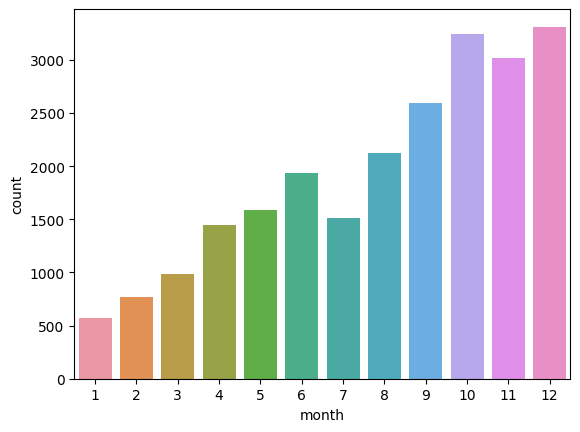

In [206]:
sns.countplot(data=taxi, x='month')

## Шаг 18

Сезонность бывает не только внутри года, но и внутри недели. **Определите, в какой день недели поступает меньше всего заказов.** Укажите то название, которое написано в самом датафрейме.

Для этого постройте аналогичный график по дням недели (см. колонку `weekday`). Задать порядок столбиков на графике можно с помощью параметра `order`, которому нужно передать список названий в нужном порядке.

<AxesSubplot:xlabel='weekday', ylabel='count'>

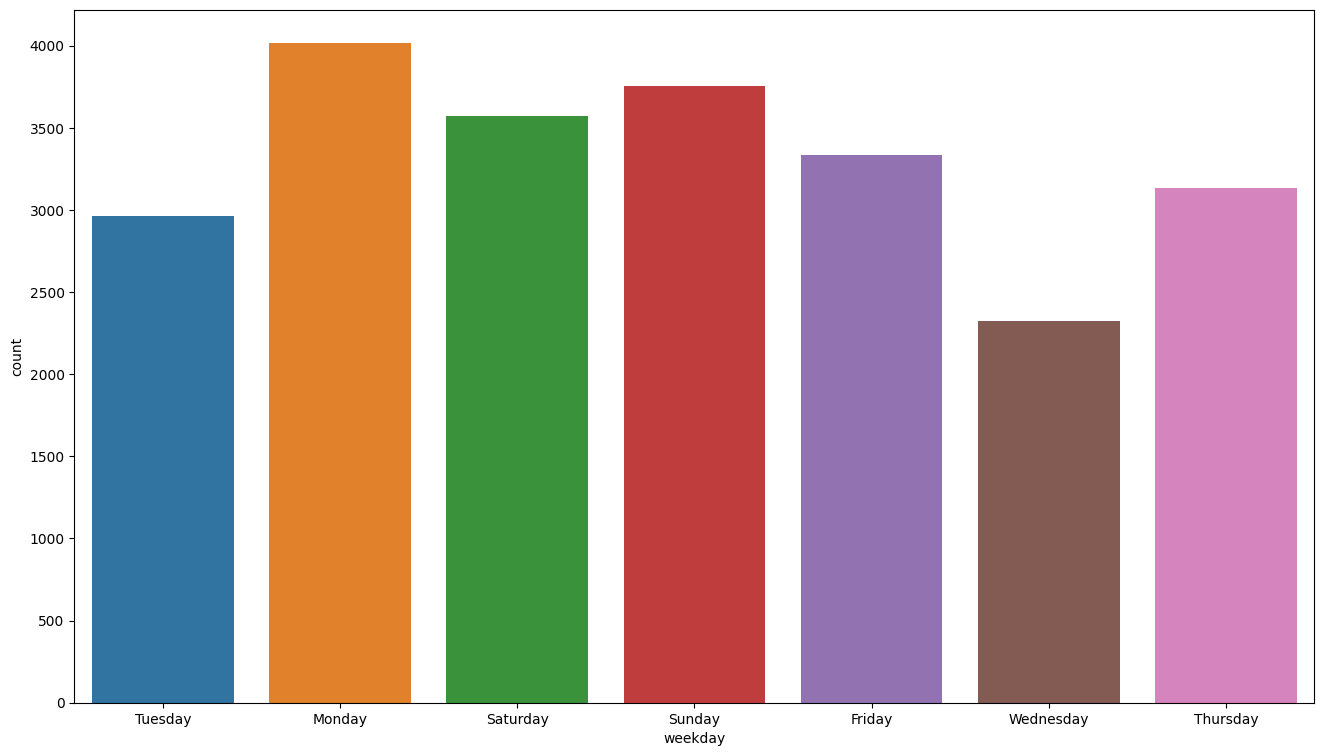

In [207]:
plt.figure(figsize=(16,9))
sns.countplot(data=taxi, x='weekday')



## Шаг 19

Познакомимся с часто используемыми метриками, показывающими число активных пользователей за определённый период:

DAU (daily active users) – число уникальных активных пользователей за день  
WAU (weekly active users) – число уникальных активных пользователей за неделю  
MAU (monthly active users) – число уникальных активных пользователей за месяц

Активные пользователи – те, кто воспользовался приложением и сделал хотя бы один заказ за выбранный промежуток времени.

**Посчитайте метрику MAU, постройте её график и выберите одно или несколько верных утверждений:**  
- Число уникальных юзеров в течение года как увеличивалось, так и уменьшалось  
- MAU за апрель примерно в 2.5 раза больше, чем за январь  
- В течение всего года число уникальных пользователей увеличивалось  
- Летом наблюдался спад числа уникальных пользователей в месяц

In [210]:
res = taxi.groupby('month').user_id.nunique().reset_index()
res

,month,user_id
0,1,102
1,2,110
2,3,162
3,4,253
4,5,275
5,6,309
6,7,318
7,8,377
8,9,416
9,10,437


<AxesSubplot:xlabel='month', ylabel='user_id'>

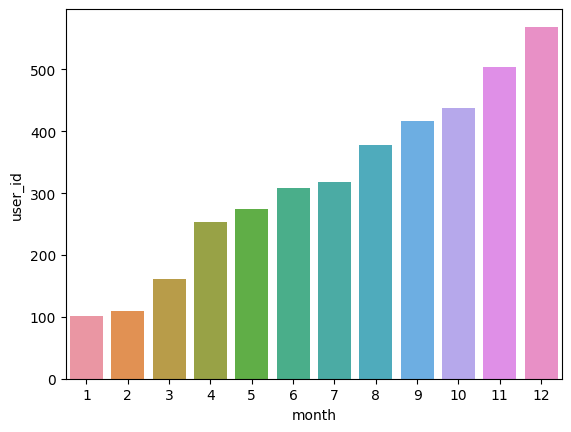

In [211]:
sns.barplot(data=res, x='month', y='user_id')



## Итоги

В этом проекте вы собрали воедино и проанализировали данные о поездках на такси в Перу в разрезе по платформам, построили графики и сравнили оценки водителей и пассажиров, определили самого опаздывающего водителя и причины его опозданий, посмотрели на годовую и недельную сезонность заказов, проанализировали метрику MAU. В процессе вы закрепили навыки работы с временнЫми данными и библиотеками pandas, seaborn и matplotlib.